In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trade_df = pd.read_csv("..Weekly_Trades/TradeStats/Trade_Edge_Record_(No_Not_What_Ur_Thinking)_TradeStats_7.2.24.csv")
trade_df.tail(10)

,Date,Trade Tags,Outcome,Outcome tags,pts win/loss,Outlined in plan?,According or against plan?,Larger SL = win?,TypeOfDay
114,6/18/24,ONLF,loss,fomo,-30.0,Y,According,NaN,Fuck
115,6/20/24,"aggression,excess,exhaustion",win,"patient,goodexit",40.0,Y,According,NaN,Fuck
116,6/25/24,"absorption,aggression",win,"patient,goodexit",40.0,N,NaN,NaN,Fuck
117,6/27/24,swingvp,loss,patient,15.0,Y,According,NaN,Fuck
118,6/27/24,"""N/A""",loss,NaN,-5.0,N,NaN,NaN,Fuck
119,6/27/24,"swingvp,spikebase",win,"patient,unluckySL,goodexit",80.0,Y,According,NaN,Fuck
120,6/28/24,"vPOC,aggression",win,"patient,goodexit",35.0,Y,According,NaN,Fuck
121,7/1/24,spikebase,loss,fomo,-7.0,Y,According,NaN,Fuck
122,7/1/24,"spikebase,aggression",win,"patient,goodexit",35.0,Y,According,NaN,Fuck
123,7/2/24,"absorption,exhaustion,aggression",win,"patient,goodexit",45.0,N,NaN,NaN,Fuck


# Questions and Stats I want to answer:

### Per trade tag, combination of outcome tags and typeOfDay that lead to best outcomes... for now we can do basic filtering and manual reading, but in the future I can make a regression model or decision tree that does this.

### Per trade tag in general what is the win %.

### Of winning trades how many were patient, fomo, unluckySL, runners win etc

### What trade type of days have the most win

In [3]:
#Trade tag dict will be a dictionary that keeps track of number of wins, number of losses, 
#type of day
#tag: ((win,typeofdaytagsdict),(loss, typeofdaytagsdict),typeofdaytagsdict)
trade_tag_dict = {}
date_dict = {}
outcome_dict = {}


In [4]:
for idx, tags in enumerate(trade_df["Trade Tags"]):
    tags_sep = tags.split(",")
    #print(trade_df["TypeOfDay"].iloc[idx])
    typeOfDays = trade_df["TypeOfDay"].iloc[idx].split(",")
    for tag in tags_sep:
        
        if trade_tag_dict.get(tag) == None:
            trade_tag_dict[tag] = [[0,{}], [0,{}], {}]
            
        if trade_df["Outcome"][idx] == "loss":
            #print(trade_tag_dict[tag][1][0])
            trade_tag_dict[tag][1][0] += 1
            for day_type in typeOfDays:
                trade_tag_dict[tag][1][1].get(day_type, 0) + 1
                
        elif trade_df["Outcome"][idx] == "win":
            trade_tag_dict[tag][0][0] += 1
            for day_type in typeOfDays:
                trade_tag_dict[tag][0][1].get(day_type, 0) + 1
                
print(trade_tag_dict)


for idx, tags in enumerate(trade_df["Outcome tags"]):
    try:
        tags_sep = tags.split(",")
    except:
        continue
    
    #try:
    typeOfDays = trade_df["TypeOfDay"].iloc[idx].split(",")
    #except:
        #continue

    
    for tag in tags_sep:
        
        if outcome_dict.get(tag) == None:
            outcome_dict[tag] = [[0,{}], [0,{}], {}]
            
        if trade_df["Outcome"][idx] == "loss":
            #print(trade_tag_dict[tag][1][0])
            outcome_dict[tag][1][0] += 1
            for day_type in typeOfDays:
                outcome_dict[tag][1][1].get(day_type, 0) + 1
                
        elif trade_df["Outcome"][idx] == "win":
            outcome_dict[tag][0][0] += 1
            for day_type in typeOfDays:
                outcome_dict[tag][0][1].get(day_type, 0) + 1
print()          
print(outcome_dict)
        

{'knife': [[0, {}], [4, {}], {}], 'ONLF': [[1, {}], [2, {}], {}], 'absorption': [[13, {}], [12, {}], {}], 'vpzone': [[17, {}], [17, {}], {}], 'openrungap': [[0, {}], [1, {}], {}], 'openingdrive': [[4, {}], [5, {}], {}], 'aggression': [[18, {}], [14, {}], {}], 'exhaustion': [[8, {}], [2, {}], {}], 'breakout': [[1, {}], [5, {}], {}], 'stoprunreversal': [[4, {}], [1, {}], {}], 'rebid': [[12, {}], [9, {}], {}], 'tapeweakness': [[5, {}], [3, {}], {}], 'openinventorycorrect': [[0, {}], [1, {}], {}], 'reoffer': [[7, {}], [12, {}], {}], 'ONHF': [[1, {}], [4, {}], {}], 'unfinishedauction': [[1, {}], [0, {}], {}], '"N/A"': [[2, {}], [12, {}], {}], 'structureshift': [[0, {}], [1, {}], {}], 'swingVP': [[0, {}], [1, {}], {}], 'catchrocket': [[0, {}], [1, {}], {}], 'reclaim': [[1, {}], [0, {}], {}], 'gapfill': [[0, {}], [1, {}], {}], 'singleprint': [[1, {}], [0, {}], {}], 'vPOC': [[2, {}], [0, {}], {}], 'LVN': [[1, {}], [0, {}], {}], 'excess': [[1, {}], [0, {}], {}], 'swingvp': [[1, {}], [1, {}], {}

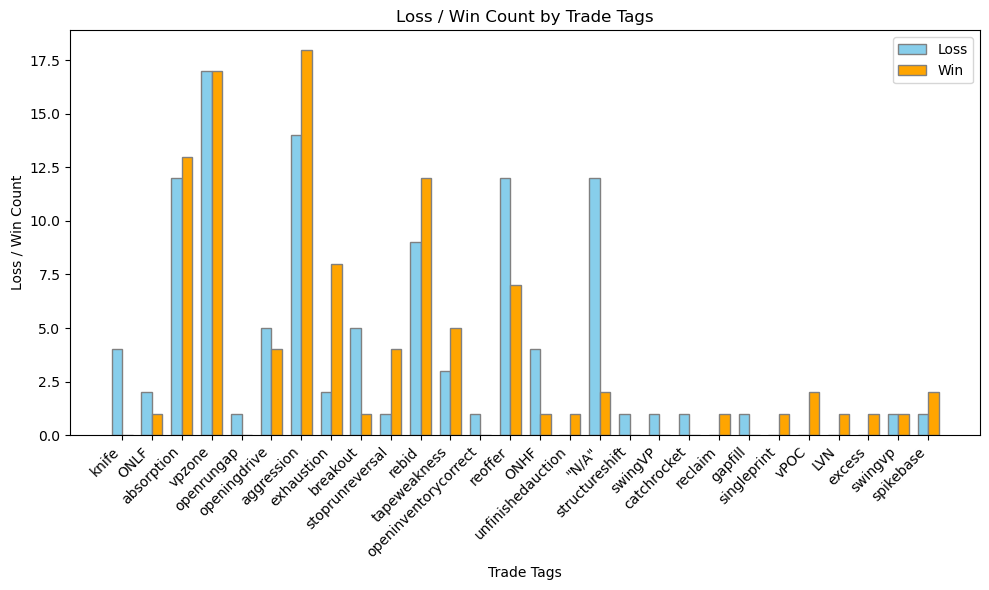

In [5]:
tags = list(trade_tag_dict.keys())
loss_counts = [trade_tag_dict[tag][1][0] for tag in tags]
win_counts = [trade_tag_dict[tag][0][0] for tag in tags]

bar_width = 0.35

r1 = np.arange(len(tags))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(10, 6))
plt.bar(r1, loss_counts, color='skyblue', width=bar_width, edgecolor='grey', label='Loss')
plt.bar(r2, win_counts, color='orange', width=bar_width, edgecolor='grey', label='Win')
plt.xlabel('Trade Tags')
plt.ylabel('Loss / Win Count')
plt.title('Loss / Win Count by Trade Tags')
plt.xticks([r + bar_width/2 for r in range(len(tags))], tags, rotation=45, ha='right')
plt.tight_layout()
plt.legend()
# Show plot
plt.show()


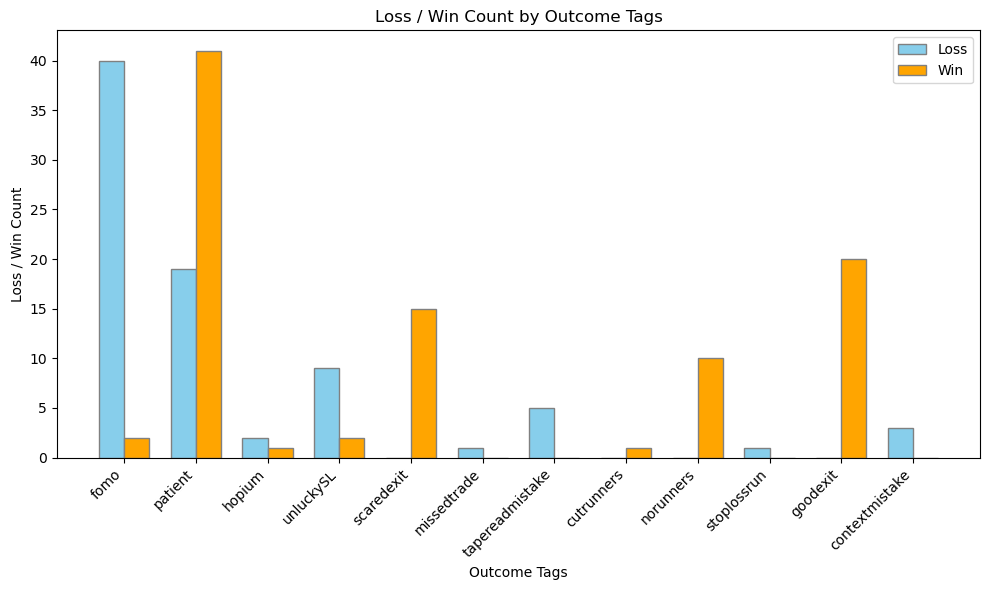

In [6]:
tags = list(outcome_dict.keys())
loss_counts = [outcome_dict[tag][1][0] for tag in tags]
win_counts = [outcome_dict[tag][0][0] for tag in tags]

bar_width = 0.35

r1 = np.arange(len(tags))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(10, 6))
plt.bar(r1, loss_counts, color='skyblue', width=bar_width, edgecolor='grey', label='Loss')
plt.bar(r2, win_counts, color='orange', width=bar_width, edgecolor='grey', label='Win')
plt.xlabel('Outcome Tags')
plt.ylabel('Loss / Win Count')
plt.title('Loss / Win Count by Outcome Tags')
plt.xticks([r + bar_width/2 for r in range(len(tags))], tags, rotation=45, ha='right')
plt.tight_layout()
plt.legend()
# Show plot
plt.show()

In [7]:
day_df = pd.read_csv("F:\\jupyter_workspace\\Trade Analysis\\Weekly_Trades\\DayStats\\Trade_Edge_Record_(No_Not_What_Ur_Thinking)_DayStats_7.2.24.csv")
day_df.tail(10)

,Date,PnL,Win Trades,Loss Trades,Win Loss Percent,# of Trades,Running PnL
35,6/10/24,172.0,1.0,1.0,100.00%,2,16.0
36,6/11/24,-563.0,0.0,3.0,0.00%,3,-547.0
37,6/17/24,375.0,1.0,2.0,50.00%,3,-172.0
38,6/18/24,-240.0,1.0,2.0,50.00%,3,-412.0
39,6/20/24,200.0,1.0,1.0,100.00%,2,-212.0
40,6/25/24,240.0,1.0,0.0,#DIV/0!,1,28.0
41,6/27/24,20.0,1.0,2.0,50.00%,3,48.0
42,6/28/24,174.0,1.0,0.0,#DIV/0!,1,222.0
43,7/1/24,146.0,1.0,1.0,100.00%,2,368.0
44,7/2/24,92.0,1.0,0.0,#DIV/0!,1,460.0


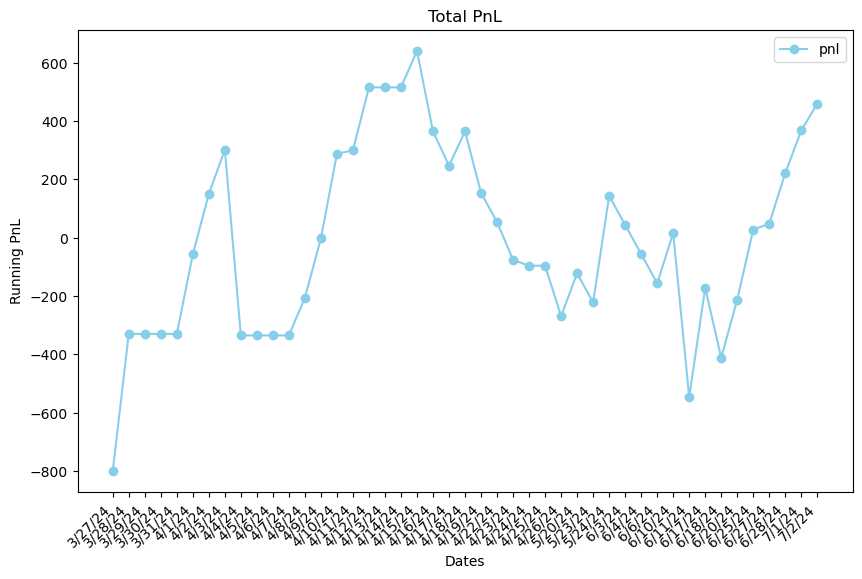

In [8]:
dates = day_df["Date"].dropna()
pnl = day_df["Running PnL"].dropna()

plt.figure(figsize=(10, 6))
plt.plot(dates, pnl, marker='o', color='skyblue', label='pnl')
plt.xlabel('Dates')
plt.ylabel('Running PnL')
plt.title('Total PnL')
plt.xticks(rotation=45, ha='right')
plt.legend()

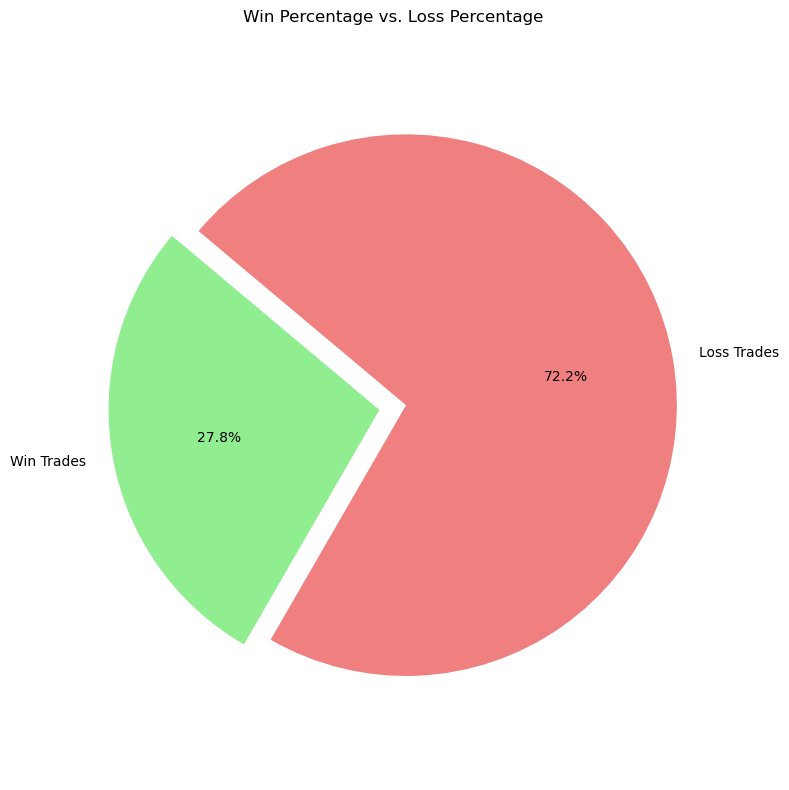

In [9]:
# Extract data from your DataFrame
win_trades = day_df['Win Trades'].sum()
loss_trades = day_df['Loss Trades'].sum()

total_trades = win_trades + loss_trades
win_percentage = (win_trades / total_trades) * 100
loss_percentage = (loss_trades / total_trades) * 100

labels = ['Win Trades', 'Loss Trades']
sizes = [win_percentage, loss_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (win trades)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Win Percentage vs. Loss Percentage')
plt.axis('equal')  
plt.tight_layout()

# Show plot
plt.show()

In [10]:
positive_days = day_df[day_df['PnL'] > 0]
negative_days = day_df[day_df['PnL'] < 0]

median_trades_positive = np.median(positive_days['# of Trades'])
median_trades_negative = np.median(negative_days['# of Trades'])

print("Median number of trades on positive days:", median_trades_positive)
print("Median number of trades on negative days:", median_trades_negative)

Median number of trades on positive days: 3.0
Median number of trades on negative days: 4.0
